In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])

In [3]:
x = data[:,0]
y = data[:,1]
colors = ['b','g','r','c','m','y','k']
labels = ['1','2','3','4','5','6']

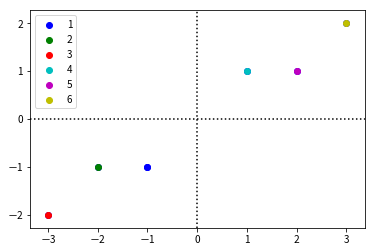

In [4]:
plt.scatter(x,y,color='blue')
for i in range(len(data)):
    plt.scatter(data[i,0],data[i,1],c=colors[i],label=labels[i])

plt.legend()

plt.axvline(0.0, ls='dotted', color='k') 
plt.axhline(0.0, ls='dotted', color='k')

plt.show()

In [5]:
pca = PCA(n_components=2)  #n_components=m,表示要將原本特徵數量變成m個新特徵
pca.fit(data)              #pca.fit()進行訓練

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [7]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.99244289 1.        ]


#### 因為第一組pca係數轉換後結果,還可以保留樣本間的99.24%變異,所以其實不需要第二組係數
#### 可以考慮使用pca(1)即可

In [8]:
print(pca.components_) #顯示原本特徵與新特徵的線性關係

[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


In [9]:
data                   #原本資料

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [10]:
data_x = pca.transform(data)

In [11]:
data_x

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [12]:
#將pca後結果逆轉回原始資料
pca.inverse_transform(data_x)

array([[-1., -1.],
       [-2., -1.],
       [-3., -2.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  2.]])

In [13]:
pca_w = PCA(n_components=2,whiten='True')  #whiten='True'表示要先進行Normalization
pca_w.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten='True')

In [14]:
data_xw = pca_w.transform(data)

In [15]:
data_xw

array([[ 0.49096647,  1.19399271],
       [ 0.78854479, -1.02218579],
       [ 1.27951125,  0.17180692],
       [-0.49096647, -1.19399271],
       [-0.78854479,  1.02218579],
       [-1.27951125, -0.17180692]])

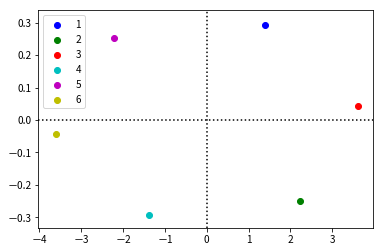

In [16]:
colors = ['b','g','r','c','m','y','k']
labels = ['1','2','3','4','5','6']

for i in range(len(data_x)):
    plt.scatter(data_x[i,0],data_x[i,1],c=colors[i],label=labels[i])


plt.legend()

plt.axvline(0.0, ls='dotted', color='k') 
plt.axhline(0.0, ls='dotted', color='k')
plt.show()

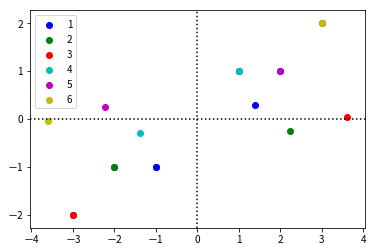

In [17]:
plt.scatter(x,y,color='blue')
for i in range(len(data)):
    plt.scatter(data[i,0],data[i,1],c=colors[i],label=labels[i])

plt.legend()

for i in range(len(data_x)):
    plt.scatter(data_x[i,0],data_x[i,1],c=colors[i],label=labels[i])

plt.axvline(0.0, ls='dotted', color='k') 
plt.axhline(0.0, ls='dotted', color='k')
plt.show()

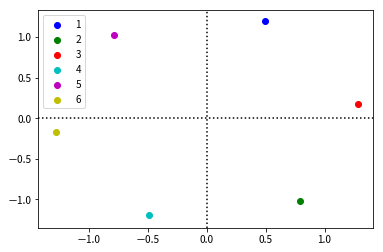

In [18]:
colors = ['b','g','r','c','m','y','k']
labels = ['1','2','3','4','5','6']

for i in range(len(data_xw)):
    plt.scatter(data_xw[i,0],data_xw[i,1],c=colors[i],label=labels[i])


plt.legend()

plt.axvline(0.0, ls='dotted', color='k') 
plt.axhline(0.0, ls='dotted', color='k')
plt.show()

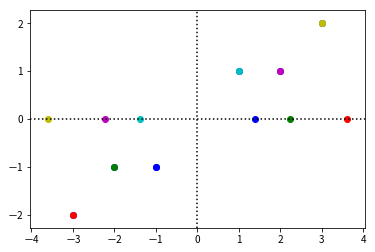

In [19]:
pca = PCA(n_components=1)                #從2維降成1維
pca.fit(data)
data_x1 = pca.transform(data)

colors = ['b','g','r','c','m','y','k']
labels = ['1','2','3','4','5','6']

plt.scatter(x,y,color='blue')
for i in range(len(data)):
    plt.scatter(data[i,0],data[i,1],c=colors[i],label=labels[i])

for i in range(len(data_x1)):
    plt.scatter(data_x1[i],0,c=colors[i],label=labels[i])


plt.axvline(0.0, ls='dotted', color='k') 
plt.axhline(0.0, ls='dotted', color='k')
plt.show()

In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [21]:
data = pd.read_csv('C:\pyml_scripts\chapter10_pca\scores.csv',names=['Name','Math','Science','Mandarin','English','Social'])

In [22]:
data

,Name,Math,Science,Mandarin,English,Social
0,Frank,89,90,67,46,50
1,Wilson,57,70,80,85,90
2,Linda,80,90,35,40,50
3,Vivid,40,60,50,45,55
4,Jacky,78,85,45,55,60
5,Richard,55,65,80,75,85
6,Allen,90,85,88,92,95


In [23]:
data_scores = data.iloc[:,1:]

In [24]:
data_scores

,Math,Science,Mandarin,English,Social
0,89,90,67,46,50
1,57,70,80,85,90
2,80,90,35,40,50
3,40,60,50,45,55
4,78,85,45,55,60
5,55,65,80,75,85
6,90,85,88,92,95


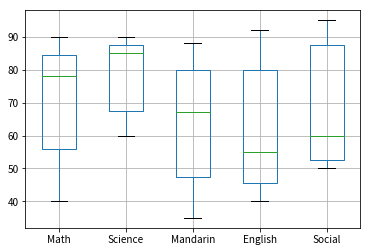

In [25]:
data_scores.boxplot()

In [26]:
data_scores.mean(axis=0)

Math        69.857143
Science     77.857143
Mandarin    63.571429
English     62.571429
Social      69.285714
dtype: float64

In [27]:
data_scores.mean(axis=1)

0    68.4
1    76.4
2    59.0
3    50.0
4    64.6
5    72.0
6    90.0
dtype: float64

In [28]:
pca = PCA(n_components=2)

In [29]:
pca.fit(data_scores)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.explained_variance_ratio_

array([0.6688013 , 0.28791087])

In [31]:
pca.components_

array([[-0.04318455, -0.11661043,  0.55136578,  0.60073709,  0.56537406],
       [-0.84543226, -0.51948621, -0.08791982, -0.08720053,  0.00667425]])

In [32]:
data_scores

,Math,Science,Mandarin,English,Social
0,89,90,67,46,50
1,57,70,80,85,90
2,80,90,35,40,50
3,40,60,50,45,55
4,78,85,45,55,60
5,55,65,80,75,85
6,90,85,88,92,95


In [33]:
data_x = pca.transform(data_scores)
data_x
#特徵1如果是越大的正數,表示該學生原本的國語,英語,社會成績應該越高
#特徵2如果是越大的負數,表示該學生原本的數學,自然成績應該越高

array([[-21.21097689, -21.47715546],
       [ 35.71460142,  11.68959258],
       [-42.0704435 , -10.53162768],
       [-22.74370588,  37.14882026],
       [-21.22256751,  -8.3637958 ],
       [ 27.54978153,  16.81652223],
       [ 43.98331082, -25.28235614]])

In [34]:
import matplotlib.pyplot as plt
plt.ion()
plt.clf()

<Figure size 432x288 with 0 Axes>

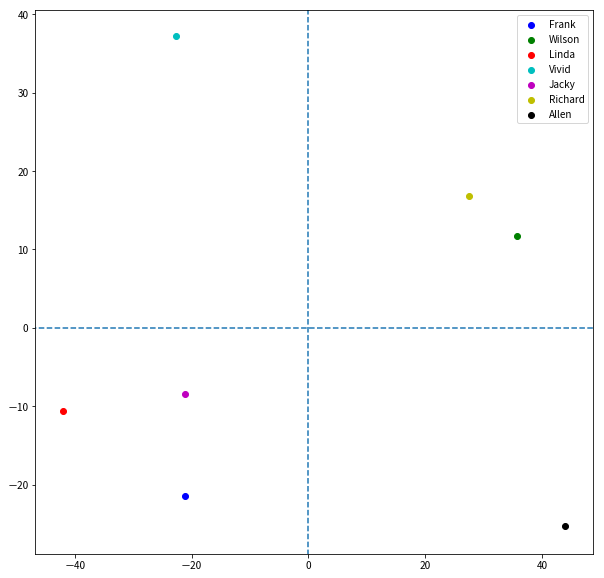

In [35]:
data['Name']
name = data['Name'].ravel()
colors = ['b','g','r','c','m','y','k']
plt.figure(figsize=(10,10))
for i in range(len(name)):
    plt.scatter(data_x[i,0],data_x[i,1],c=colors[i],label=name[i])

plt.axhline(xmin=-50.0,xmax=50.0,linestyle='--')
plt.axvline(ymin=-30.0,ymax=40.0,linestyle='--')
plt.legend()
plt.show()

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
LDA = LinearDiscriminantAnalysis(n_components=2)

In [38]:
data_target=pd.DataFrame(
    [
        ["C"],["B"],["D"],["D"],["C"],["B"],["A"]
    ],columns=['level']
)

y_target=data_target['level'].ravel()
y_target

array(['C', 'B', 'D', 'D', 'C', 'B', 'A'], dtype=object)

In [39]:
data_scores.merge(data_target,left_index=True,right_index=True)

,Math,Science,Mandarin,English,Social,level
0,89,90,67,46,50,C
1,57,70,80,85,90,B
2,80,90,35,40,50,D
3,40,60,50,45,55,D
4,78,85,45,55,60,C
5,55,65,80,75,85,B
6,90,85,88,92,95,A


In [40]:
lda_x=LDA.fit_transform(data_scores,y_target)
lda_x

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[ 2.75212596, -1.71432926],
       [-6.03901834,  0.79566534],
       [ 6.97496405, -0.48663249],
       [ 6.55378163,  1.50542224],
       [ 3.02094435, -0.30187461],
       [-3.64103126,  0.98721126],
       [-9.62176639, -0.78546249]])

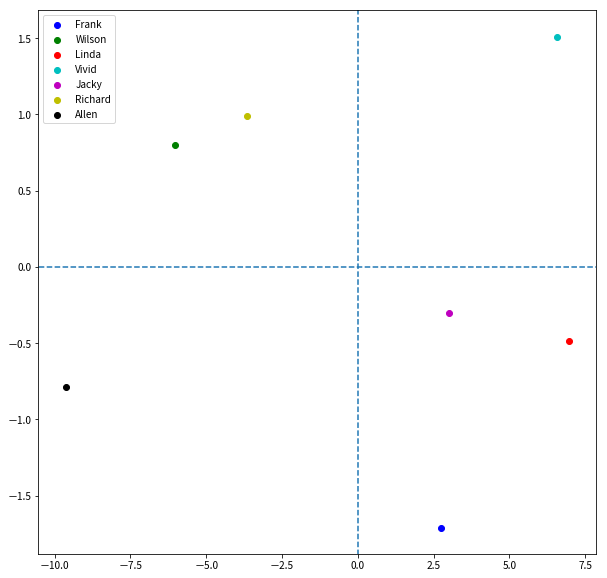

In [41]:
name = data['Name'].ravel()
colors = ['b','g','r','c','m','y','k']
plt.figure(figsize=(10,10))
for i in range(len(name)):
    plt.scatter(lda_x[i,0],lda_x[i,1],c=colors[i],label=name[i])

plt.axhline(xmin=-12.0,xmax=8.0,linestyle='--')
plt.axvline(ymin=-2.0,ymax=2.0,linestyle='--')
plt.legend()
plt.show()

In [42]:
wine = pd.read_csv(r'C:\pyml_scripts\chapter10_pca\winequality-red.csv',sep=';')
wine_feature = wine.drop('quality',axis=1)
wine_quality = wine['quality']
pca2 = PCA(n_components=2,whiten=True)
wine_pca2 = pca2.fit_transform(wine_feature)

In [43]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.94657698, 0.99494528])

In [44]:
quality=wine['quality'].unique()
quality

array([5, 6, 7, 4, 8, 3], dtype=int64)

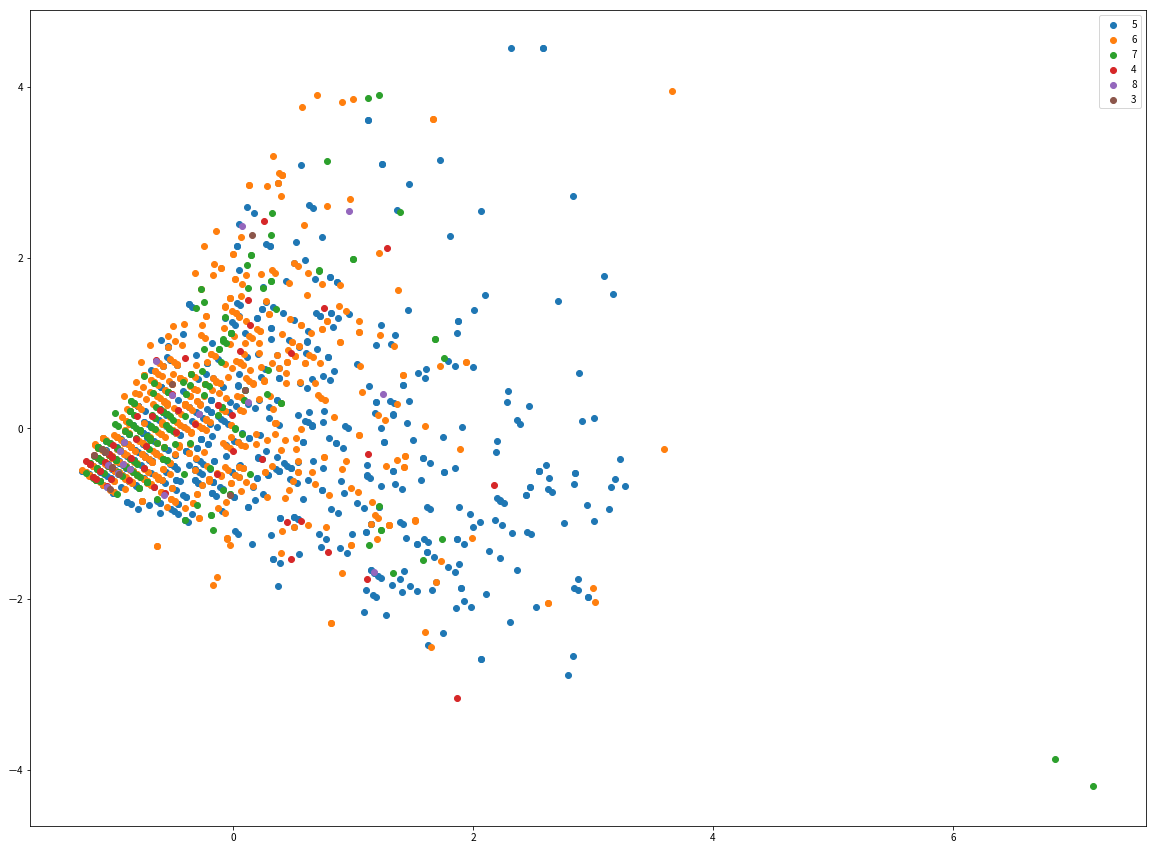

In [45]:
plt.figure(figsize=(20,15))
for i in quality:
    wine_pca2[wine[wine['quality']==i].index]
    plt.scatter(wine_pca2[wine[wine['quality']==i].index][:,0],wine_pca2[wine[wine['quality']==i].index][:,1],label=i)
    
plt.legend()